In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import scipy.linalg as la

import quantecon as qe

In [148]:
# おまじない
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
# olrprobust_3はリカッチのif文を削除した
# olrprobust_2との相違点は上記があるか、ないか
from olrprobust_3_using import olrp,olrprobust,doubleo

# olrprobust_2はリカッチのif文有〼
# matlabを極力そのまま移し替えた。
#from olrprobust_2_using import olrp, olrprobust, doubleo

# olrprobust_1はgithubから
#from olrprobust_1_using import olrp,olrprobust,doubleo

In [150]:
# Set parameters
mu_d = 13.0
rho = 0.05
gan = 9.0
c_d = 1.0
beta = 0.95

R = 1 / beta

In [151]:
# y=[1 d k]のやつ

Q = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 1e-9]])
A = np.array([[1.0, 0.0, 0.0], [(1.0 - rho) * mu_d, rho, 0.0], [-gan, 1.0, R]])
B = np.array([[0.0], [0.0], [-1.0]])
C = np.array([[0.0], [c_d], [0.0]])
R_hyouka = np.array([[1]])


[[-3.31758509 -0.05249346 -0.0526316 ]]
0.7924226173066341
[ 1.         12.62790506  0.3028189 ]
sig= -0.000000001 : welfare= -392.39
[[-3.70560377 -0.05863299 -0.05878729]]
0.7924226173066341
[ 1.         12.62790506 -5.22376986]
sig= -0.100000000 : welfare= -395.40


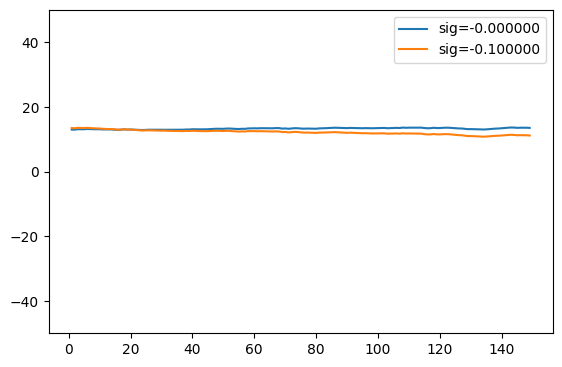

In [152]:
iter_t = 150
d_0 = 0.0

sig_arr=[-1e-9,-1e-1]
#sig_arr=[-1e-1,-1]

y = np.zeros((1, 3))

plt.figure(figsize=[6.5, 4.2])
plt.ylim((-50,50))
for where, sig in enumerate(sig_arr):
    F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
    print(F)


    np.random.seed(5)
    eps = np.random.randn(iter_t)
    print(eps[100])
    y = np.array([[1.0, 0.0, 0.0]])


    ABF = A - np.dot(B, F)
    # print(y[0])
    # print(y.shape)
    for i in range(iter_t):
        # print(i)
        # F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
        # Tmp = A -np.dot(B,F) + np.dot(C,K)
        # print(f"y = \n{np.dot(Tmp, y[0].T) + CLQ.T * eps[i]}")
        # print(y)
        # print(y.shape)
        y = np.insert(y, 0, np.dot(ABF, y[0].T) + C.T * eps[i], axis=0)
        if i == 0:
            y[0][2] = 0

    y = y[::-1]

    print(y[13])

    c = np.zeros(iter_t + 1)
    # print("c size before %d"%c.shape)
    
    for i in range(1, iter_t):
        # print("k = %d"%k_get[(iter_t + 1) * where + i - 1])
        # print(i)
        # print(y[i])
        c[i] = -F @ y[i] + gan
        # print("c = %d"%c[i])

    # print(c.shape)
    

    # Plot consumption
    plt.plot(
        np.array(range(1, iter_t)),
        c[1:iter_t],
        linestyle="-",
        label="sig=%f" % sig,
    )

    # Legend with specified arguments
    plt.legend()
    #plt.ylim((-50,50))



    #welfare
    expected_utility = 0
    for t in range(len(c)):
        u_t=-(c[t]-gan)**2
        expected_utility += beta**t * u_t

    print(f"sig= {sig:.9f} : welfare= {expected_utility:.2f}")
    
